In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-09-12 18:47:40--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-09-12 18:47:40 (18.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [6]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [8]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [10]:
data.shape

(162, 2)

In [11]:
X = data[:, 0].reshape(-1, 1) # This will be like (N, 1) because -1 is a wild-card value

In [13]:
Y = data[:, 1]

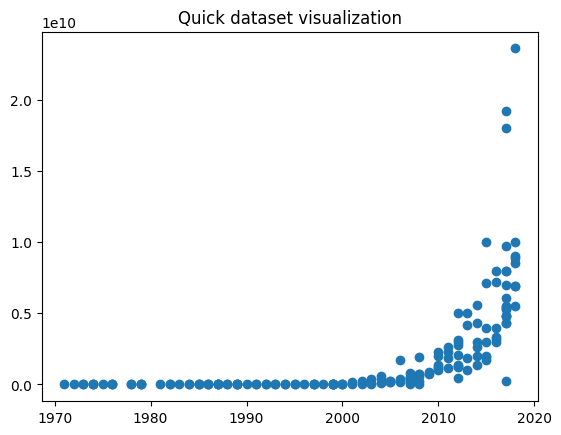

In [14]:
plt.scatter(X, Y)
plt.title('Quick dataset visualization')
plt.show()

In [15]:
# Because the data has an exponential trend we can use the log to make it linear
Y = np.log(Y)

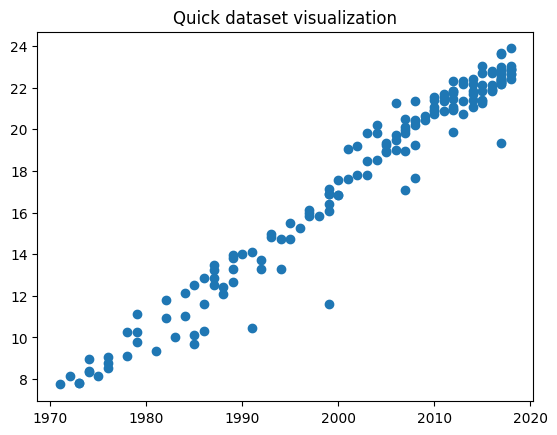

In [16]:
plt.scatter(X, Y)
plt.title('Quick dataset visualization')
plt.show()

In [17]:
X = X - X.mean()

# Training

## Build the model

In [19]:
model = tf.keras.models.Sequential(
    layers = [
        tf.keras.layers.Input(shape=(1, ),),
        tf.keras.layers.Dense(units=1, ),
    ],
)

In [21]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(.001, .9), # learning-rate, momentum
    loss = 'mse',
)

In [22]:
def schedule(epoch: int, lr: float) -> float:
    if epoch >= 50:
        return .0001
    else:
        return .001

In [23]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [24]:
tf.random.set_seed(42)
r = model.fit(
    X, Y,
    epochs = 200,
    callbacks = [scheduler],
)

Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 320.8738 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 293.4165 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 417.0007 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 245.3328 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 199.8681 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 143.9525 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 118.4113 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 109.8599 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 74.2710 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 55.8399 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss:

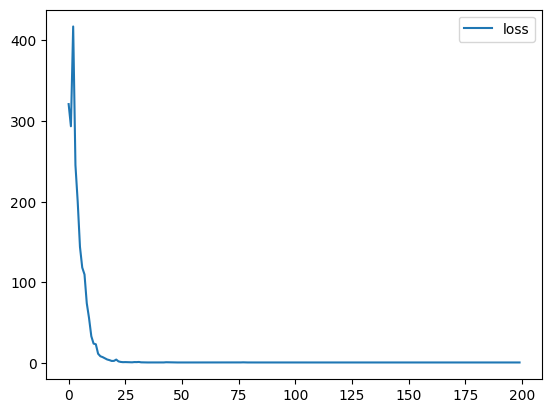

In [26]:
plt.plot(r.history['loss'], label='loss',)
plt.legend()
plt.show()

In [29]:
w = model.layers[0].get_weights()
print(w)

[array([[0.3413651]], dtype=float32), array([17.758224], dtype=float32)]


In [40]:
a, b = w[0][0][0], w[1][0]

In [42]:
print(f"Time to double is {np.log(2) / a}")

Time to double is 2.030515663977933


In [43]:
# We notice that the number of transistors doubles every two years.
# Which goes with the moore's law